<a href="https://colab.research.google.com/github/amandaarruda/imersao_dados_alura/blob/main/Segunda_aula_Imers%C3%A3o_Dados.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
url = "https://gist.githubusercontent.com/tgcsantos/3bdb29eba6ce391e90df2b72205ba891/raw/22fa920e80c9fa209a9fccc8b52d74cc95d1599b/dados_imoveis.csv"
dados = pd.read_csv(url)

In [2]:
dados.info()
#a coluna valor é a 7 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10008 entries, 0 to 10007
Data columns (total 8 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Rua        6574 non-null   object
 1   Bairro     9996 non-null   object
 2   Cidade     10008 non-null  object
 3   Metragem   10008 non-null  int64 
 4   Quartos    10008 non-null  int64 
 5   Banheiros  10008 non-null  int64 
 6   Vagas      10008 non-null  int64 
 7   Valor      10008 non-null  object
dtypes: int64(4), object(4)
memory usage: 625.6+ KB


In [3]:
dados["Valor"][0]
#vai pegar o valor da linha 0

'R$ 7.000.000'

In [4]:
dados["Valor"][0].split()
#vai separar os valores dos cifrões

['R$', '7.000.000']

In [6]:
dados.sample(10)
#pra checar a limpeza dos dados

,Rua,Bairro,Cidade,Metragem,Quartos,Banheiros,Vagas,Valor
3999,Rua Doutor Queirós Guimarães,Jardim Guedala,São Paulo,407,4,6,5,R$ 12.000\n /Mês
5388,NaN,Cidade Jardim,São Paulo,400,4,6,4,R$ 4.000.000
2218,Rua Vicente Leporace,Campo Belo,São Paulo,485,7,8,4,R$ 2.750.000
3402,NaN,Jardim Sílvia (Zona Oeste),São Paulo,1643,4,6,10,R$ 3.800.000
8034,Rua Mário,Vila Romana,São Paulo,155,3,3,2,R$ 1.250.000
6699,Avenida Aratãs,Indianópolis,São Paulo,265,3,3,2,R$ 990.000
6898,Rua Moura Brasil,Butantã,São Paulo,305,3,3,4,R$ 1.600.000
3084,NaN,Alto de Pinheiros,São Paulo,730,4,6,10,R$ 7.800.000
4170,NaN,Boaçava,São Paulo,350,4,5,4,R$ 3.600.000
6000,NaN,Jardim Vila Mariana,São Paulo,300,3,2,6,R$ 2.500.000


In [7]:
#existem valores que têm escrito outras coisas além do cifrão e do valor (sujos)
#é preciso adicionar o string (método)
dados["Valor"].str.split()
#gera uma series do panda com a separação de todas as linhas

0          [R$, 7.000.000]
1          [R$, 3.700.000]
2            [R$, 380.000]
3            [R$, 685.000]
4            [R$, 540.000]
               ...        
10003        [R$, 665.000]
10004      [R$, 2.300.000]
10005      [R$, 1.050.000]
10006    [R$, 2.200, /Mês]
10007        [R$, 270.000]
Name: Valor, Length: 10008, dtype: object

In [8]:
dados["Valor"].str.split(expand = True)
#separa cada elemento da coluna

,0,1,2
0,R$,7.000.000,None
1,R$,3.700.000,None
2,R$,380.000,None
3,R$,685.000,None
4,R$,540.000,None
...,...,...,...
10003,R$,665.000,None
10004,R$,2.300.000,None
10005,R$,1.050.000,None
10006,R$,2.200,/Mês


In [9]:
#para garantir que só tem cifrão na primeira coluna:
dados["Valor"].str.split(expand = True)[0].unique()
#esse comando diz se o valor único é o RS

array(['R$'], dtype=object)

In [10]:
#para saber quantos valores diferentes existem (tamanho da array):
len(dados["Valor"].str.split(expand = True)[1].unique())
#se der uma quantidade menor do que o total imóveis, é porque existem valores iguais

1038

In [11]:
#para garantir também o mês na coluna 2:
dados["Valor"].str.split(expand = True)[2].unique()
#aparecem mais dados (de aluguel)

array([None, '/Mês', '/Ano', '/Dia'], dtype=object)

In [12]:
#para selecionar mais de uma coluna:
dados[["Valor","Bairro"]]

,Valor,Bairro
0,R$ 7.000.000,Planalto Paulista
1,R$ 3.700.000,Jardim dos Estados
2,R$ 380.000,Jardim Reimberg
3,R$ 685.000,Jardim Morumbi
4,R$ 540.000,Mooca
...,...,...
10003,R$ 665.000,Vila Sofia
10004,R$ 2.300.000,Bosque da Saúde
10005,R$ 1.050.000,Vila da Saúde
10006,R$ 2.200\n /Mês,Vila Oratório


In [13]:
#para adicionar as informações da periodicidade do valor ao df e das demais colunas:
dados[["Moeda", "Valor_anuncio", "Tipo_anuncio"]] = dados["Valor"].str.split(expand = True)
dados.head()

,Rua,Bairro,Cidade,Metragem,Quartos,Banheiros,Vagas,Valor,Moeda,Valor_anuncio,Tipo_anuncio
0,"Avenida Itacira, 255",Planalto Paulista,São Paulo,1000,4,8,6,R$ 7.000.000,R$,7.000.000,None
1,"Rua Aurelia Perez Alvarez, 42",Jardim dos Estados,São Paulo,496,4,4,4,R$ 3.700.000,R$,3.700.000,None
2,Rua Alba Valdez,Jardim Reimberg,São Paulo,125,4,3,2,R$ 380.000,R$,380.000,None
3,NaN,Jardim Morumbi,São Paulo,310,3,2,4,R$ 685.000,R$,685.000,None
4,"Rua Tobias Barreto, 195",Mooca,São Paulo,100,3,2,2,R$ 540.000,R$,540.000,None


In [14]:
#eliminar os anuncios que são de aluguel (coluna Tipo_anuncio não nula):
dados[dados["Tipo_anuncio"].isnull()]

,Rua,Bairro,Cidade,Metragem,Quartos,Banheiros,Vagas,Valor,Moeda,Valor_anuncio,Tipo_anuncio
0,"Avenida Itacira, 255",Planalto Paulista,São Paulo,1000,4,8,6,R$ 7.000.000,R$,7.000.000,None
1,"Rua Aurelia Perez Alvarez, 42",Jardim dos Estados,São Paulo,496,4,4,4,R$ 3.700.000,R$,3.700.000,None
2,Rua Alba Valdez,Jardim Reimberg,São Paulo,125,4,3,2,R$ 380.000,R$,380.000,None
3,NaN,Jardim Morumbi,São Paulo,310,3,2,4,R$ 685.000,R$,685.000,None
4,"Rua Tobias Barreto, 195",Mooca,São Paulo,100,3,2,2,R$ 540.000,R$,540.000,None
...,...,...,...,...,...,...,...,...,...,...,...
10002,Avenida Odila,Planalto Paulista,São Paulo,267,3,6,4,R$ 1.500.000,R$,1.500.000,None
10003,Rua Tapuçu,Vila Sofia,São Paulo,95,2,2,2,R$ 665.000,R$,665.000,None
10004,Rua Guararema,Bosque da Saúde,São Paulo,605,8,7,5,R$ 2.300.000,R$,2.300.000,None
10005,Rua Estero Belaco,Vila da Saúde,São Paulo,205,3,3,6,R$ 1.050.000,R$,1.050.000,None


In [15]:
#conferindo se deu certo:
dados[dados["Tipo_anuncio"].isnull()]["Tipo_anuncio"].unique()
#Não tendo nada, deu certo

array([None], dtype=object)

In [16]:
#se true é nulo e false é não nulo, queremos ficar só com o nulo
dados_vendas = dados[dados["Tipo_anuncio"].isnull()]
dados_vendas
#dica: se fizer uma alteração, roda o código de antes também (dependendo do tamanho)

,Rua,Bairro,Cidade,Metragem,Quartos,Banheiros,Vagas,Valor,Moeda,Valor_anuncio,Tipo_anuncio
0,"Avenida Itacira, 255",Planalto Paulista,São Paulo,1000,4,8,6,R$ 7.000.000,R$,7.000.000,None
1,"Rua Aurelia Perez Alvarez, 42",Jardim dos Estados,São Paulo,496,4,4,4,R$ 3.700.000,R$,3.700.000,None
2,Rua Alba Valdez,Jardim Reimberg,São Paulo,125,4,3,2,R$ 380.000,R$,380.000,None
3,NaN,Jardim Morumbi,São Paulo,310,3,2,4,R$ 685.000,R$,685.000,None
4,"Rua Tobias Barreto, 195",Mooca,São Paulo,100,3,2,2,R$ 540.000,R$,540.000,None
...,...,...,...,...,...,...,...,...,...,...,...
10002,Avenida Odila,Planalto Paulista,São Paulo,267,3,6,4,R$ 1.500.000,R$,1.500.000,None
10003,Rua Tapuçu,Vila Sofia,São Paulo,95,2,2,2,R$ 665.000,R$,665.000,None
10004,Rua Guararema,Bosque da Saúde,São Paulo,605,8,7,5,R$ 2.300.000,R$,2.300.000,None
10005,Rua Estero Belaco,Vila da Saúde,São Paulo,205,3,3,6,R$ 1.050.000,R$,1.050.000,None


In [17]:
dados_vendas.info()
#percebe-se que o valor ainda não está em float

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9156 entries, 0 to 10007
Data columns (total 11 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Rua            6107 non-null   object
 1   Bairro         9146 non-null   object
 2   Cidade         9156 non-null   object
 3   Metragem       9156 non-null   int64 
 4   Quartos        9156 non-null   int64 
 5   Banheiros      9156 non-null   int64 
 6   Vagas          9156 non-null   int64 
 7   Valor          9156 non-null   object
 8   Moeda          9156 non-null   object
 9   Valor_anuncio  9156 non-null   object
 10  Tipo_anuncio   0 non-null      object
dtypes: int64(4), object(7)
memory usage: 858.4+ KB


In [18]:
#não dá pra tirar a média ainda. é preciso tirar o ponto
dados_vendas["Valor_anuncio"].str.replace(".","")

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  


0        7000000
1        3700000
2         380000
3         685000
4         540000
          ...   
10002    1500000
10003     665000
10004    2300000
10005    1050000
10007     270000
Name: Valor_anuncio, Length: 9156, dtype: object

In [19]:
#agora, para converter: 
dados_vendas["Valor_anuncio"].str.replace(".","").astype(float)
#Por enquanto, isso tá à parte. É preciso colocar isso lá na tabela dos dados

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  


0        7000000.0
1        3700000.0
2         380000.0
3         685000.0
4         540000.0
           ...    
10002    1500000.0
10003     665000.0
10004    2300000.0
10005    1050000.0
10007     270000.0
Name: Valor_anuncio, Length: 9156, dtype: float64

In [20]:
#colocando na tabela:
dados_vendas["Valor_anuncio_float"] = dados_vendas["Valor_anuncio"].str.replace(".","").astype(float)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


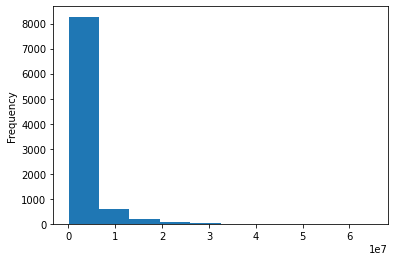

In [21]:
dados_vendas["Valor_anuncio_float"].plot.hist()
#histograma

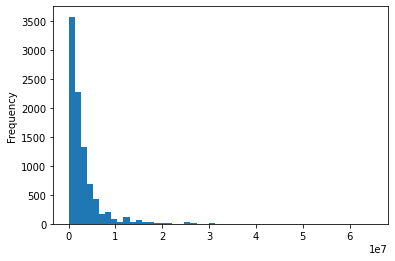

In [22]:
#bins divide as caixinhas 
dados_vendas["Valor_anuncio_float"].plot.hist(bins = 50)

In [23]:
#descrevendo:
dados_vendas.describe()

,Metragem,Quartos,Banheiros,Vagas,Valor_anuncio_float
count,9156.000000,9156.000000,9156.000000,9156.000000,9.156000e+03
mean,434.416230,3.446811,3.797073,3.960135,3.052203e+06
std,7856.422978,1.048944,1.967873,2.601022,3.944208e+06
min,10.000000,1.000000,1.000000,1.000000,1.300000e+04
25%,168.000000,3.000000,2.000000,2.000000,8.900000e+05
50%,276.000000,3.000000,4.000000,4.000000,1.800000e+06
75%,450.000000,4.000000,5.000000,5.000000,3.500000e+06
max,750000.000000,16.000000,40.000000,50.000000,6.500000e+07


In [24]:
#desafio:
#tirando a escala da notação científica e deixando ela em milhões

In [26]:
#para descrever com determinada precisão
pd.set_option("display.precision", 2)
pd.set_option('display.float_format', lambda x: "%.2f" % x)
dados_vendas.describe()

,Metragem,Quartos,Banheiros,Vagas,Valor_anuncio_float
count,9156.00,9156.00,9156.00,9156.00,9156.00
mean,434.42,3.45,3.80,3.96,3052202.96
std,7856.42,1.05,1.97,2.60,3944208.19
min,10.00,1.00,1.00,1.00,13000.00
25%,168.00,3.00,2.00,2.00,890000.00
50%,276.00,3.00,4.00,4.00,1800000.00
75%,450.00,4.00,5.00,5.00,3500000.00
max,750000.00,16.00,40.00,50.00,65000000.00


In [28]:
#o include = "all" mostra variáveis não numéricas também
dados_vendas.describe(include = "all")

,Rua,Bairro,Cidade,Metragem,Quartos,Banheiros,Vagas,Valor,Moeda,Valor_anuncio,Tipo_anuncio,Valor_anuncio_float
count,6107,9146,9156,9156.00,9156.00,9156.00,9156.00,9156,9156,9156,0,9156.00
unique,3006,697,1,NaN,NaN,NaN,NaN,939,1,939,0,NaN
top,Rua Alberto Faria,Alto de Pinheiros,São Paulo,NaN,NaN,NaN,NaN,R$ 2.500.000,R$,2.500.000,NaN,NaN
freq,24,369,9156,NaN,NaN,NaN,NaN,182,9156,182,NaN,NaN
mean,NaN,NaN,NaN,434.42,3.45,3.80,3.96,NaN,NaN,NaN,NaN,3052202.96
std,NaN,NaN,NaN,7856.42,1.05,1.97,2.60,NaN,NaN,NaN,NaN,3944208.19
min,NaN,NaN,NaN,10.00,1.00,1.00,1.00,NaN,NaN,NaN,NaN,13000.00
25%,NaN,NaN,NaN,168.00,3.00,2.00,2.00,NaN,NaN,NaN,NaN,890000.00
50%,NaN,NaN,NaN,276.00,3.00,4.00,4.00,NaN,NaN,NaN,NaN,1800000.00
75%,NaN,NaN,NaN,450.00,4.00,5.00,5.00,NaN,NaN,NaN,NaN,3500000.00


In [29]:
#prestar atenção nos pontos fora da curva

In [30]:
#para selecionar só determinadas colunas:
dados_vendas[["Rua","Bairro","Cidade"]].describe()

,Rua,Bairro,Cidade
count,6107,9146,9156
unique,3006,697,1
top,Rua Alberto Faria,Alto de Pinheiros,São Paulo
freq,24,369,9156


In [31]:
#usando a biblioteca seaborn
import seaborn as sns

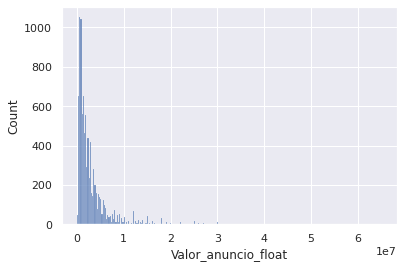

In [35]:
#plotando um histograma
#paramentro ja dele
sns.set()
sns.histplot(data = dados_vendas, x = "Valor_anuncio_float")

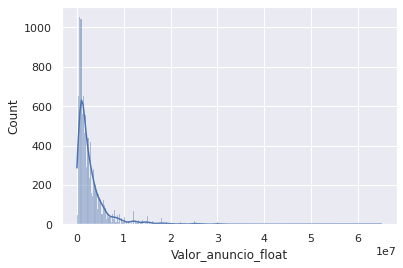

In [36]:
#com curva de aproximação:
sns.set()
sns.histplot(data = dados_vendas, x = "Valor_anuncio_float", kde = True)

In [39]:
#a escala não tá boa. solução:
#importar o matplot
import matplotlib.pyplot as plt

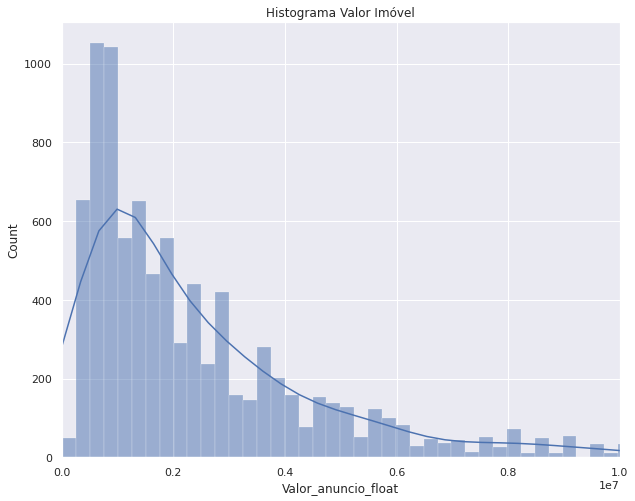

In [40]:
sns.set()
#ajusta o fundo
plt.figure(figsize=(10, 8))
ax = sns.histplot(data = dados_vendas, x = "Valor_anuncio_float", kde = True)
ax.set_title("Histograma Valor Imóvel")
#ajusta o tamanho do eixo x
plt.xlim((-50, 10000000))
plt.show()

In [41]:
#é normal misturar essas duas bibliotecas